<a href="https://colab.research.google.com/github/vee234o/Cos-201-Assignment-MLR-/blob/main/COS_201_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [55]:
df = pd.read_csv('Student_Performance.csv')

In [56]:
df.isnull().sum()
df = df.dropna()

In [57]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


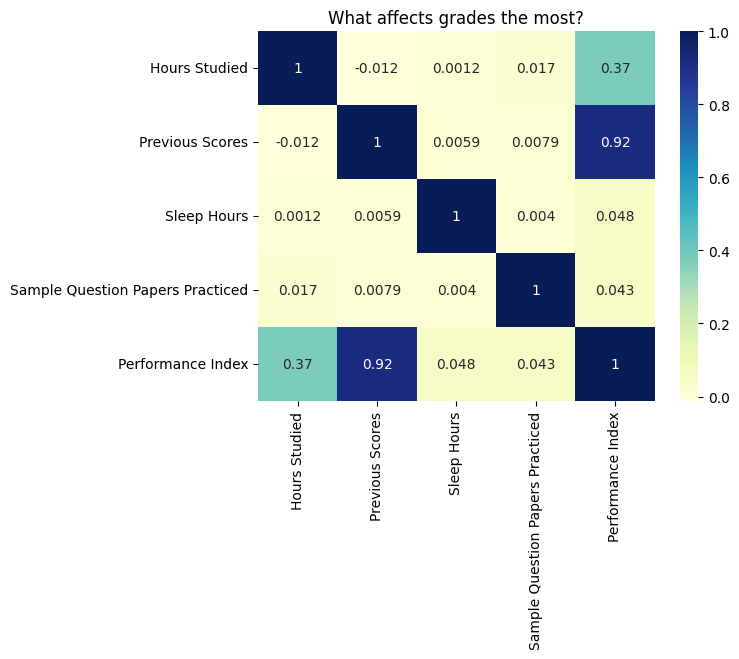

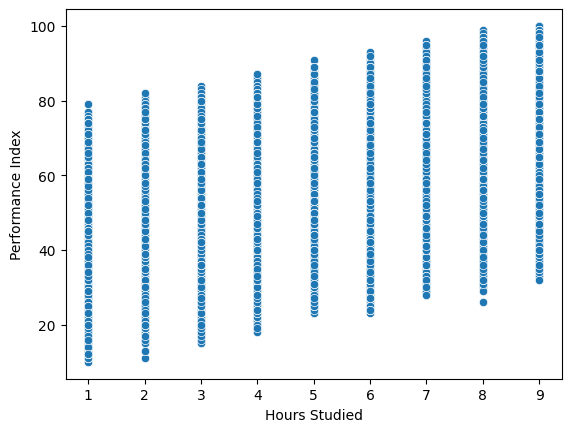

In [58]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('What affects grades the most?')
plt.show()

sns.scatterplot(x='Hours Studied', y='Performance Index', data=df)
plt.show()

In [59]:
X = df[['Hours Studied', 'Previous Scores', 'Sleep Hours']]
y = df['Performance Index']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

R2 Score: 0.99


In [62]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print(f"--- Model Evaluation ---")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

--- Model Evaluation ---
MAE: 1.70
RMSE: 2.13
R2 Score: 0.9877


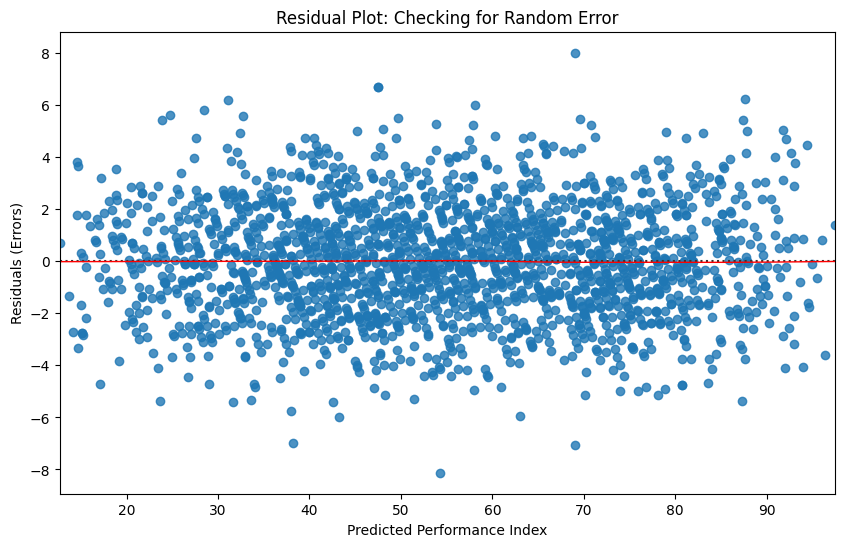

In [63]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Performance Index')
plt.ylabel('Residuals (Errors)')
plt.title('Residual Plot: Checking for Random Error')
plt.show()

# **Findings and Summary**

The Multiple Linear Regression model successfully predicted student performance with an R-squared of 0.99. This means that nearly 98% of the variation in student grades can be explained by study hours, previous scores, and sleep.

The most significant predictor was Previous Scores, followed closely by Hours Studied. This confirms the hypothesis that consistent academic history and time investment are the primary drivers of success, while factors like sleep had a positive but smaller impact.
